In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp

In [2]:
df = pd.read_csv('../hardware/MAX30102/ir_red.csv', skiprows=lambda x: x in range(1, 200))
df = df[['IR', 'Red']]

In [3]:
df

,IR,Red
0,67661,72579
1,67654,72592
2,67626,72578
3,67637,72583
4,67626,72570
...,...,...
46812,67146,72938
46813,67142,72937
46814,67156,72930
46815,67157,72918


/opt/homebrew/Caskroom/miniforge/base/envs/python38/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


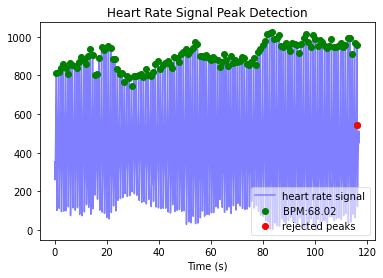

In [4]:
#enhanced = hp.enhance_peaks(df['IR'], iterations=2)
#400 is in reference to sample rate
bandpassFilter = hp.filter_signal(df['IR'],[0.75, 4], 400, order=2, filtertype='bandpass')
working_data, measures = hp.process(hp.scale_data(bandpassFilter), 400)

hp.plotter(working_data, measures)

In [5]:
working_data, measures = hp.process_segmentwise(hp.scale_data(bandpassFilter), 400, segment_width=5)
output = pd.DataFrame(measures)

In [6]:
output

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,segment_indices
0,68.689181,873.500,16.248077,13.806701,22.290693,0.250000,0.000000,10.00,15.129648,13.169567,625.965216,1.148834,0.228990,"(0, 2000)"
1,71.216617,842.500,79.451243,57.210549,88.961017,0.750000,0.500000,42.50,52.326723,73.912691,12150.451779,0.707953,0.237473,"(2000, 4000)"
2,69.930070,858.000,28.080242,21.937411,37.165172,0.500000,0.250000,12.50,25.739075,22.980970,1858.280104,1.120017,0.233155,"(4000, 6000)"
3,68.259386,879.000,32.580669,21.677681,43.857012,0.750000,0.250000,32.50,31.008441,30.243155,2946.163933,1.025304,0.227583,"(6000, 8000)"
4,68.298236,878.500,25.670995,18.071040,36.098823,0.750000,0.000000,10.00,24.526771,22.517354,1735.032499,1.089239,0.227687,"(8000, 10000)"
5,66.992324,895.625,19.872641,5.137012,24.706612,0.666667,0.000000,12.50,15.069284,19.702651,932.754087,0.764835,0.279174,"(10000, 12000)"
6,65.146580,921.000,29.393877,26.003305,48.234453,0.750000,0.500000,30.00,34.035253,29.003637,3101.210956,1.173482,0.217250,"(12000, 14000)"
7,64.908722,924.375,35.016737,29.035419,60.724789,0.666667,0.666667,10.00,42.679360,31.324910,4200.080428,1.362474,0.270490,"(14000, 16000)"
8,67.453626,889.500,59.190371,41.207364,67.233269,0.750000,0.250000,37.50,42.763430,54.777604,7359.112442,0.780674,0.224921,"(16000, 18000)"
9,68.620443,874.375,10.950885,7.168604,18.142951,0.333333,0.000000,8.75,12.829004,7.406829,298.521145,1.732051,0.285959,"(18000, 20000)"


In [7]:
def pneumonia_analysis(row):
    return row['temp'] > 37.8 and row['bpm'] > 100 and row['breathingrate'] > 0.33

In [8]:
output['temp'] = 38
output['pulseox'] = 91
output['pneumonia'] = output.apply(pneumonia_analysis, axis=1)
output['hypoxemia'] = output.apply(lambda x: x['pulseox'] < 90, axis=1)
output['lowHRV'] = output.apply(lambda x: x['rmssd'] < 21, axis=1)

In [9]:
output

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,segment_indices,temp,pulseox,pneumonia,hypoxemia,lowHRV
0,68.689181,873.500,16.248077,13.806701,22.290693,0.250000,0.000000,10.00,15.129648,13.169567,625.965216,1.148834,0.228990,"(0, 2000)",38,91,False,False,False
1,71.216617,842.500,79.451243,57.210549,88.961017,0.750000,0.500000,42.50,52.326723,73.912691,12150.451779,0.707953,0.237473,"(2000, 4000)",38,91,False,False,False
2,69.930070,858.000,28.080242,21.937411,37.165172,0.500000,0.250000,12.50,25.739075,22.980970,1858.280104,1.120017,0.233155,"(4000, 6000)",38,91,False,False,False
3,68.259386,879.000,32.580669,21.677681,43.857012,0.750000,0.250000,32.50,31.008441,30.243155,2946.163933,1.025304,0.227583,"(6000, 8000)",38,91,False,False,False
4,68.298236,878.500,25.670995,18.071040,36.098823,0.750000,0.000000,10.00,24.526771,22.517354,1735.032499,1.089239,0.227687,"(8000, 10000)",38,91,False,False,False
5,66.992324,895.625,19.872641,5.137012,24.706612,0.666667,0.000000,12.50,15.069284,19.702651,932.754087,0.764835,0.279174,"(10000, 12000)",38,91,False,False,False
6,65.146580,921.000,29.393877,26.003305,48.234453,0.750000,0.500000,30.00,34.035253,29.003637,3101.210956,1.173482,0.217250,"(12000, 14000)",38,91,False,False,False
7,64.908722,924.375,35.016737,29.035419,60.724789,0.666667,0.666667,10.00,42.679360,31.324910,4200.080428,1.362474,0.270490,"(14000, 16000)",38,91,False,False,False
8,67.453626,889.500,59.190371,41.207364,67.233269,0.750000,0.250000,37.50,42.763430,54.777604,7359.112442,0.780674,0.224921,"(16000, 18000)",38,91,False,False,False
9,68.620443,874.375,10.950885,7.168604,18.142951,0.333333,0.000000,8.75,12.829004,7.406829,298.521145,1.732051,0.285959,"(18000, 20000)",38,91,False,False,True
